In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

** Problem 1 **: 7 pts- Using

$$
\cos(x) = \sum_{j=0}^{\infty}\frac{(-1)^{j}}{(2j)!}x^{2j},
$$

derive a Taylor series for $\cos(x^{2})$ around $x=0$.  Write a code which computes the Taylor series of $\cos(x^{2})$ using recursion and a tolerance based while loop approach.(4pts)  On the interval $[0,\pi]$, plot the semi-log error in your approximation for tolerance values $10^{-4}$, $10^{-6}$, and $10^{-8}$. Describe your graphs and comment on any trends you observe.(3pts)

_Answers to Problem 1_

In [53]:
def cossq(x,tol):
    tot = 1.
    aj = 1.
    jj = 1
    x4 = -x**4.
    while np.abs(aj)>=tol:
        aj *= x4/((2.*jj)*(2.*jj-1.))
        tot += aj
        jj += 1
    return tot

C:\Users\mrssi\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
C:\Users\mrssi\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\mrssi\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


Text(0,0.5,'$\\log_{10}|Error|$')

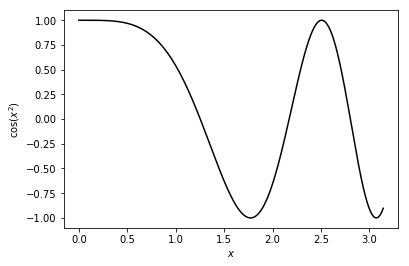

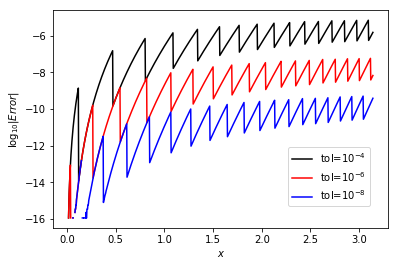

In [62]:
xvals = np.linspace(0.,np.pi,int(1e3))
cvalst = np.cos(xvals**2.)
cvals1 = [cossq(xval,1e-4) for xval in xvals]
cvals2 = [cossq(xval,1e-6) for xval in xvals]
cvals3 = [cossq(xval,1e-8) for xval in xvals]

plt.figure(1)
plt.plot(xvals,cvalst,color='k')
plt.xlabel('$x$')
plt.ylabel('$\cos(x^{2})$')

plt.figure(2)
plt.plot(xvals,np.log10(np.abs(cvalst-cvals1)),color='k',label='tol=$10^{-4}$')
plt.plot(xvals,np.log10(np.abs(cvalst-cvals2)),color='r',label='tol=$10^{-6}$')
plt.plot(xvals,np.log10(np.abs(cvalst-cvals3)),color='b',label='tol=$10^{-8}$')

plt.legend(loc=(.7,.1))

plt.xlabel('$x$')
plt.ylabel('$\log_{10}|Error|$')

As we see from the log plot of the error, our Taylor series approximation to $\cos(x^{2})$ gets worse the further from $x=0$ that we get, regardless of the tolerance value.  However, we see that the approximation also improves markedly as we reduce the tolerance so that when `tol`=$10^{-8}$, our approximation is good to at least ten digits even when $x$ is close to $\pi$.

** Problem 2 **: 7 pts- An important function in physics is the Airy function given by the Taylor Series

$$
y_{1}(x) = 1 + \sum_{m=1}^{\infty}c_{m}x^{3m}, ~ c_{m} = \prod_{l=1}^{m} \frac{1}{(3l-1)(3l)}.
$$

Note the coefficients $c_{m}$ follow the pattern

\begin{align}
c_{1} = & \prod_{l=1}^{1} \frac{1}{(3l-1)(3l)} = \frac{1}{2\cdot 3}\\
c_{2} = & \prod_{l=1}^{2} \frac{1}{(3l-1)(3l)} = \frac{1}{2\cdot 3 \cdot 5 \cdot 6}
\end{align}

Using recursion and a tolerance based while loop approach, write a code which makes two separate plots, one for $-L_{x}\leq x \leq 0$ and one for $0\leq x \leq L_{x}$, where $L_{x}$ is a user specified value (4pts).  Provide plots for $L_{x}=5,15$ and for tolerances $10^{-8}$ and $10^{-10}$. and describe the phenomena you see in the eight different plots. (3pts)

_Answers to Problem 2_:

So, if we define the terms of our series $a_{m}(x)=c_{m}x^{3m}$, we see that 

$$
\frac{a_{m}(x)}{a_{m-1}(x)} = \frac{x^{3}}{(3m-1)(3m)}
$$

so that we see 

$$
a_{m}(x) = \left \{\begin{array}{rl} \frac{x^{3}}{(3m-1)(3m)}a_{m-1}(x) & m\geq 1 \\ 1 & m=0  \end{array}\right.
$$

In [4]:
def afunc(x,tol):
    tot = 1.
    am = 1.
    m = 1
    x3 = x**3.
    while np.abs(am)>=tol:
        am *= x3/(3.*m*(3.*m-1.))
        tot += am
        m += 1
    return tot  

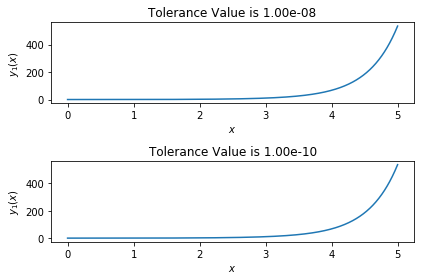

In [5]:
# In order to get different graphs to appear at the same time you will need to use subplot.  This gets used like

xpos05 = np.linspace(0.,5.,int(1e3))
ypos051 = [afunc(xval,1e-8) for xval in xpos05]
ypos052 = [afunc(xval,1e-10) for xval in xpos05] 

plt.subplot(2,1,1)
plt.plot(xpos05,ypos051)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-8)

plt.subplot(2,1,2)
plt.plot(xpos05,ypos052)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-10)

plt.tight_layout()

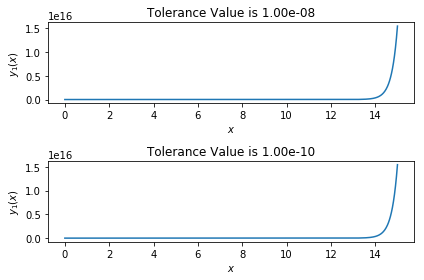

In [6]:
xpos15 = np.linspace(0.,15.,int(1e3))
ypos151 = [afunc(xval,1e-8) for xval in xpos15]
ypos152 = [afunc(xval,1e-10) for xval in xpos15]

plt.subplot(2,1,1)
plt.plot(xpos15,ypos151)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-8)

plt.subplot(2,1,2)
plt.plot(xpos15,ypos152)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-10)

plt.tight_layout()

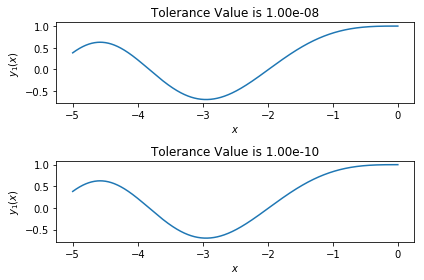

In [7]:
xneg05 = np.linspace(-5.,0.,int(1e3))
yneg051 = [afunc(xval,1e-8) for xval in xneg05]
yneg052 = [afunc(xval,1e-10) for xval in xneg05] 

plt.subplot(2,1,1)
plt.plot(xneg05,yneg051)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-8)

plt.subplot(2,1,2)
plt.plot(xneg05,yneg052)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-10)

plt.tight_layout()

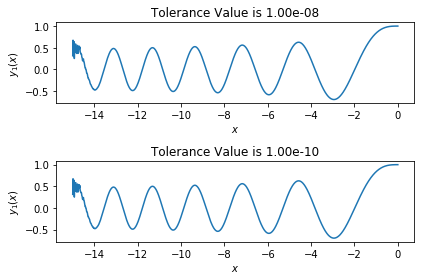

In [8]:
xneg15 = np.linspace(-15.,0.,int(1e3))
yneg151 = [afunc(xval,1e-8) for xval in xneg15]
yneg152 = [afunc(xval,1e-10) for xval in xneg15] 

plt.subplot(2,1,1)
plt.plot(xneg15,yneg151)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-8)

plt.subplot(2,1,2)
plt.plot(xneg15,yneg152)
plt.xlabel('$x$')
plt.ylabel('$y_{1}(x)$')
plt.title('Tolerance Value is %1.2e' %1e-10)

plt.tight_layout()

As we see, for $x\geq 0$, $y_{1}(x)$ grows rapidly, and we can believe our results since this persists over different domain sizes and is unchanged by decreasing the tolerance.  Likewise, we anticipate that $y_{1}(x)$ oscillates for $x\leq 0$.  However, we also see that near $x=-15$ our approximation likely breaksdown since the behavior changes in an unexpected way.  This shift in behavior persists even after decreasing the tolerance, so it is not immediatley clear at this time what the cause of this radical change in the behavior of our approximation is.  

** Problem 3 **: 5 pts- If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6, and 9.  The sum of these multiples is 23.  Find the sum of all multiples of 3 or 5 below 100.  Note, you will need to make use of the mod command `%`, which in effect finds remainders from division.  Note the use below. Likewise you will also need to use the logical operation `or`. 

In [4]:
# How to use %

print 1%2
print 2%2
print 3%2
print 4%2
print
print 11%5
print 12%5
print 13%5
print 14%5
print 15%5

1
0
1
0

1
2
3
4
0


_Answer to Problem 3_  

In [15]:
tot = 0
for jj in xrange(0,100):
    if jj%5 == 0 or jj%3 == 0:
        tot += jj
print "The sum of all the numbers which are multiples of either 3 or 5 which are less than 100 is: %3d" % tot

The sum of all the numbers which are multiples of either 3 or 5 which are less than 100 is: 2318


** Problem 4 **: 5 pts - Using a for loop based approach, write a program which finds 

$$
\frac{1}{n}\sum_{j=1}^{n} \left(\left(\frac{j}{n}\right)^{4} + 3\left(\frac{j}{n}\right)^{2} \right)
$$

for any positive integer n.  Generate a labeled plot of the results of your function for $1\leq n \leq 100$, where $n$ will be on the $x$-axis, while the results of your function will appear on the $y$-axis.  Describe any trends you see from your graph.       

_Answer to Problem 4_

In [48]:
def func(n):
    tot = 0.
    ncmp = float(n)
    for jj in xrange(1,int(n)+1):
        jsq = (jj/ncmp)**2.
        tot += (jsq + 3.)*jsq
    return tot/ncmp

Text(0.5,0,'$n$')

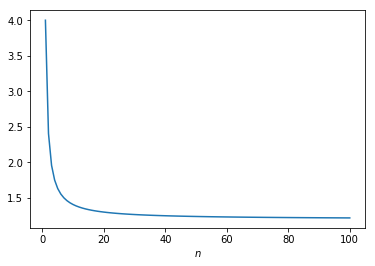

In [49]:
nvals = np.linspace(1.,100.,100)
fvals = [func(nval) for nval in nvals]

plt.plot(nvals,fvals)
plt.xlabel('$n$')

As we see, there is a natural limit to $f(n)$ as $n$ gets large.  We might reasonably conjecture, using 

In [51]:
print "f(100)=%2.15f" % func(100)

f(100)=1.220083333000000


that

$$
\lim_{n\rightarrow \infty} f(n) \approx 1.22008333
$$